<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/57_histogram_equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [1]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 21.4 MB/s eta 0:00:00


In [2]:
import cv2
import matplotlib.pyplot as plt
import pooch
import rasterio as rio
import rasterio.plot as ras_plot

In [3]:
u22_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/raster/U22.tif',
    known_hash='e31ab10ca0a6f917c3bba2eea5d0e1a8c3ed0fde4e8b9174183019bb9f830c74'
)

In [4]:
with rio.open(u22_file) as src:
    img_rgb = ras_plot.reshape_as_image(src.read())[3500:4500, 3000:4000, :]

In [5]:
# Reference: https://stackoverflow.com/a/15009815
y, cr, cb = cv2.split(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb))
y_equ = cv2.equalizeHist(y)
equalized = cv2.cvtColor(cv2.merge([y_equ, cr, cb]), cv2.COLOR_YCrCb2RGB)

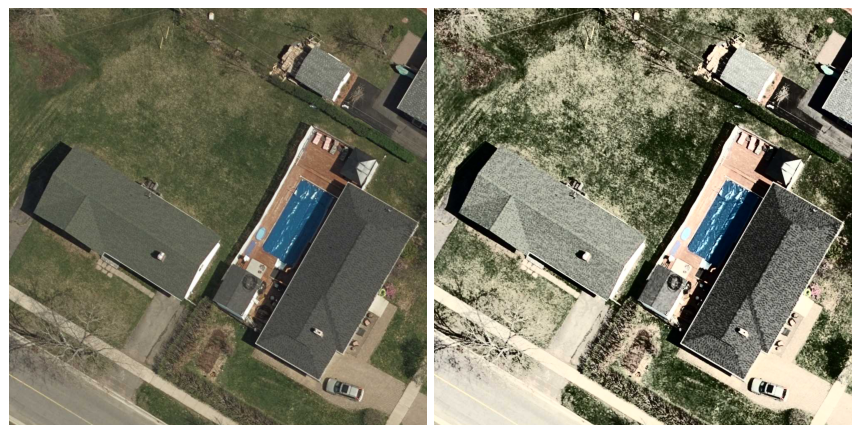

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10), constrained_layout=True)
ax[0].imshow(img_rgb)
ax[1].imshow(equalized, cmap='gray')
ax[0].axis('off')
ax[1].axis('off')
plt.gcf().set_dpi(85);